In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
#Load data set train and test csv files
train_data = pd.read_csv("/home/neethu/Downloads/train_ctrUa4K.csv")
test_data = pd.read_csv("/home/neethu/Downloads/test_lAUu6dG.csv")


# Exploratory Data Analysis

In [3]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_data.shape

(614, 13)

In [5]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [8]:
test_data.shape

(367, 12)

In [9]:
test_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [10]:
test_data.info

<bound method DataFrame.info of       Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001015   Male     Yes          0      Graduate            No   
1    LP001022   Male     Yes          1      Graduate            No   
2    LP001031   Male     Yes          2      Graduate            No   
3    LP001035   Male     Yes          2      Graduate            No   
4    LP001051   Male      No          0  Not Graduate            No   
..        ...    ...     ...        ...           ...           ...   
362  LP002971   Male     Yes         3+  Not Graduate           Yes   
363  LP002975   Male     Yes          0      Graduate            No   
364  LP002980   Male      No          0      Graduate            No   
365  LP002986   Male     Yes          0      Graduate            No   
366  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                  0   

Text(0, 0.5, 'Frequency')

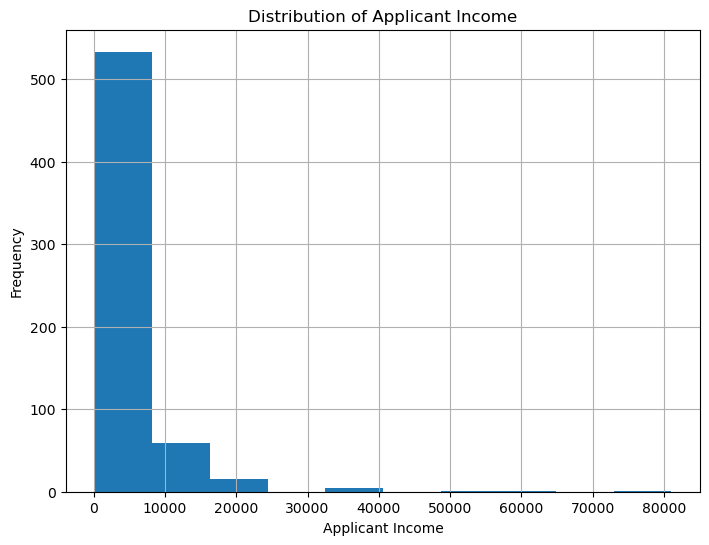

In [11]:
#Visualize the distribution of variables
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
train_data['ApplicantIncome'].hist()
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

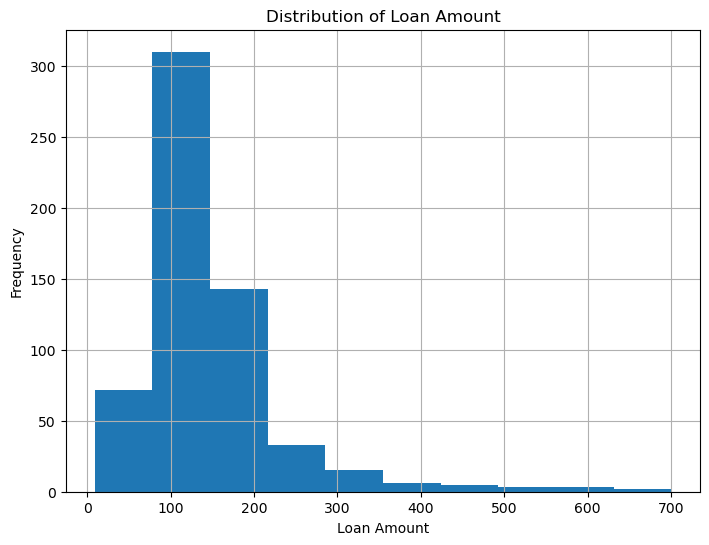

In [12]:
# Example: Visualize the distribution of variables
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 2)
train_data['LoanAmount'].hist()
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')


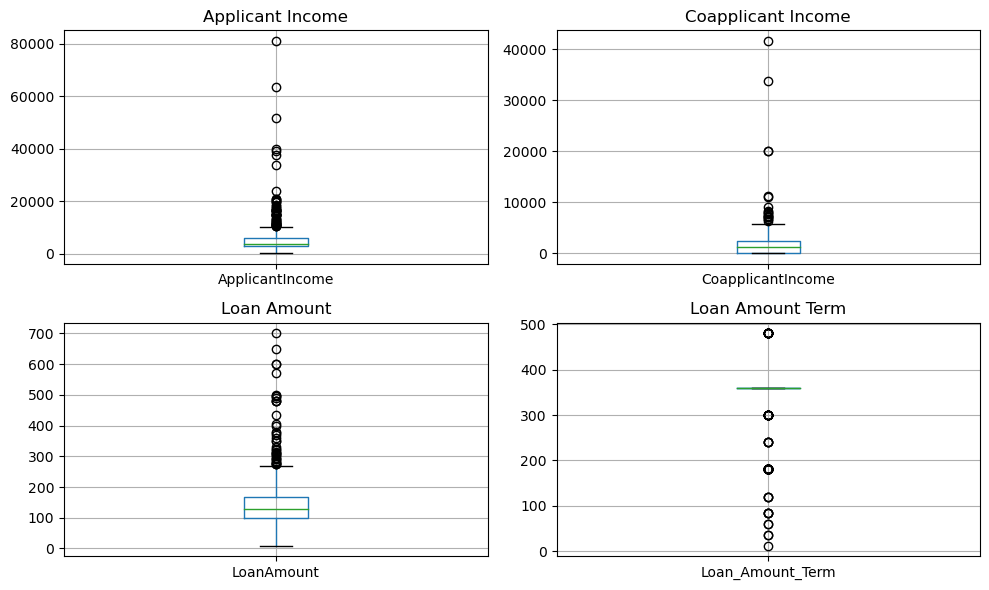

In [13]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
train_data.boxplot(column='ApplicantIncome')
plt.title('Applicant Income')

plt.subplot(2, 2, 2)
train_data.boxplot(column='CoapplicantIncome')
plt.title('Coapplicant Income')

plt.subplot(2, 2, 3)
train_data.boxplot(column='LoanAmount')
plt.title('Loan Amount')

plt.subplot(2, 2, 4)
train_data.boxplot(column='Loan_Amount_Term')
plt.title('Loan Amount Term')

plt.tight_layout()
plt.show()


/tmp/ipykernel_135072/3967640244.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data.corr()


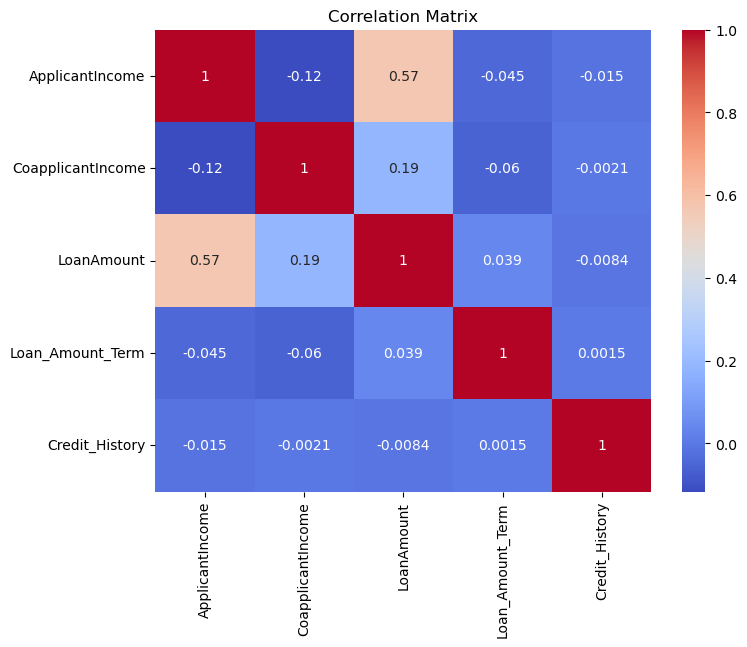

In [14]:
import seaborn as sns
correlation_matrix = train_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


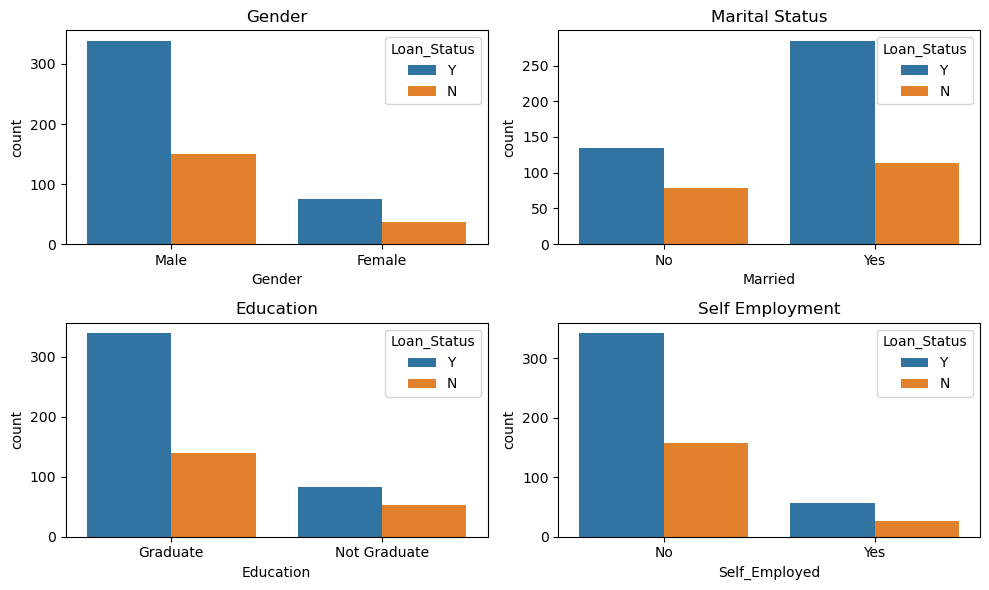

In [15]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
sns.countplot(x='Gender', hue='Loan_Status', data=train_data)
plt.title('Gender')

plt.subplot(2, 2, 2)
sns.countplot(x='Married', hue='Loan_Status', data=train_data)
plt.title('Marital Status')

plt.subplot(2, 2, 3)
sns.countplot(x='Education', hue='Loan_Status', data=train_data)
plt.title('Education')

plt.subplot(2, 2, 4)
sns.countplot(x='Self_Employed', hue='Loan_Status', data=train_data)
plt.title('Self Employment')

plt.tight_layout()
plt.show()


<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

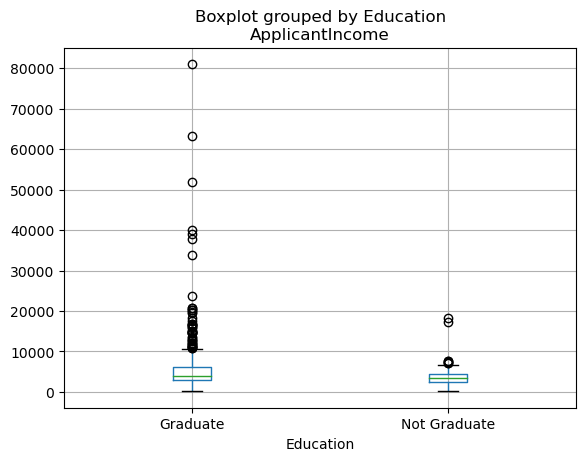

In [16]:
train_data.boxplot(column="ApplicantIncome", by="Education")

In [17]:
temp1 = train_data["Credit_History"].value_counts(ascending=True)
temp2 = train_data.pivot_table(values="Loan_Status", index=['Credit_History'], aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())
print ("Frequency Table for Credit History: ")
print (temp1)

print ("\n Probability of Getting a Loan for each Credit History Class: ")
print( temp2)

Frequency Table for Credit History: 
0.0     89
1.0    475
Name: Credit_History, dtype: int64

 Probability of Getting a Loan for each Credit History Class: 
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


<Axes: xlabel='Credit_History'>

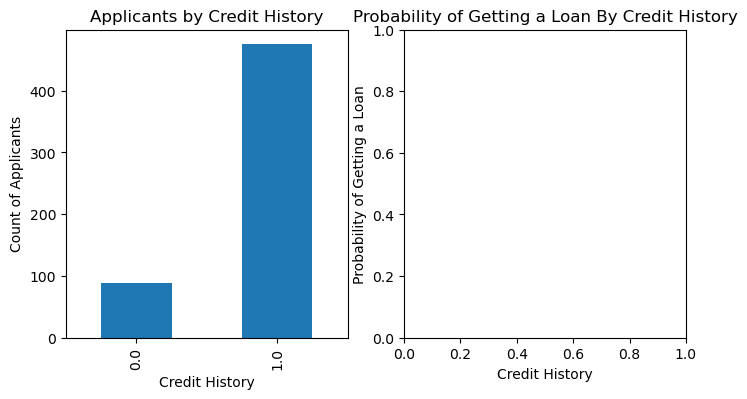

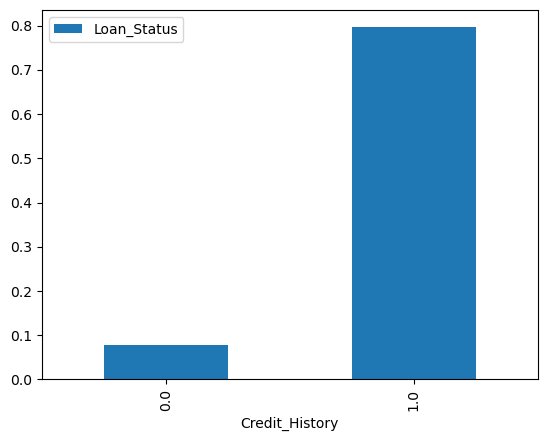

In [18]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel("Credit History")
ax1.set_ylabel("Count of Applicants")
ax1.set_title("Applicants by Credit History")
temp1.plot(kind="bar")

ax2 = fig.add_subplot(122)
ax2.set_xlabel("Credit History")
ax2.set_ylabel("Probability of Getting a Loan")
ax2.set_title("Probability of Getting a Loan By Credit History")
temp2.plot(kind="bar")

In [19]:
train_data.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
train_data["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [21]:
train_data["Gender"].fillna('Male', inplace=True)

In [22]:
train_data["Gender"].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [23]:
train_data["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [24]:
train_data["Married"].fillna('Yes', inplace=True)
train_data["Married"].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [25]:
train_data["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [26]:
train_data.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
train_data["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [28]:
train_data["Self_Employed"].fillna("Yes", inplace=True)
train_data["Self_Employed"].value_counts()

No     500
Yes    114
Name: Self_Employed, dtype: int64

In [29]:
train_data.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [30]:
train_data["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [31]:
train_data["Credit_History"].fillna(1.0, inplace=True)
train_data["Credit_History"].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [32]:
train_data.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [33]:
train_data["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [34]:
train_data["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [35]:
train_data["Loan_Amount_Term"].fillna(360.0, inplace=True)

In [36]:
train_data["Loan_Amount_Term"].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [37]:
train_data.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [38]:
train_data["Dependents"].fillna(0, inplace=True)
train_data.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: title={'center': 'LoanAmount'}, xlabel='[Education, Self_Employed]'>

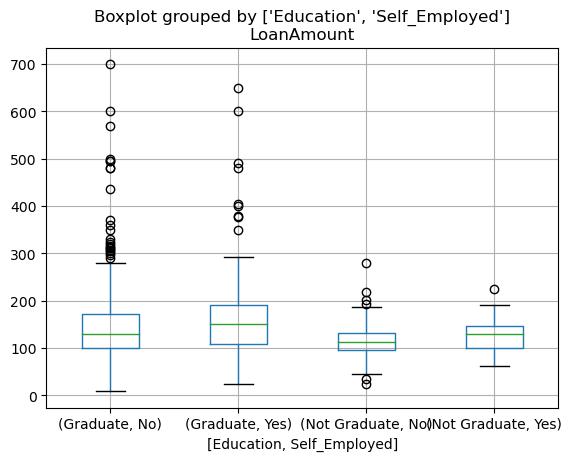

In [39]:
train_data.boxplot(column="LoanAmount", by=["Education", "Self_Employed"])


In [40]:
import numpy as np
table = train_data.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
# Define function to return value of this pivot_table
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]
# Replace missing values
train_data['LoanAmount'].fillna(train_data[train_data['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [41]:
train_data.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Outliers / Extreme Values

Outliers which are possible practically (ie. high loan amounts) can have their effect nullified by applying the log function to them.

In [42]:
# train_data["LoanAmount"].hist(bins=50)

In [43]:
# train_data["LoanAmountLog"] = np.log(train_data["LoanAmount"])
# train_data["LoanAmountLog"].hist(bins=20)

Thus, these are better distributions than before (less skewed / moved by the outliers).

To remove the outliers in ApplicantIncome, notice that outliers for low applicant income can exist if candidates have a strong coapplicant. Thus, we can add the two fields, and then apply a log!

In [44]:
# train_data["TotalIncome"] = train_data["ApplicantIncome"] +train_data["CoapplicantIncome"]
# train_data["TotalIncomeLog"] = np.log(train_data["TotalIncome"])
# train_data["TotalIncomeLog"].hist(bins=20)

# Building Predictive Models

Having cleaned up the data, we can now build different predictive models and train them on this dataset. Scikit-learn is the perfect library to do this!

Note: Scikit-learn requries all it's variables to be numeric, thus the categorical variables need to be encoded and turned into numerical variables.scikit-learn provides a function to do just that!

In [45]:
from sklearn.preprocessing import LabelEncoder

var_mod = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area", "Loan_Status"]
# Convert 'Dependents' column to string
train_data['Dependents'] = train_data['Dependents'].astype(str)

le = LabelEncoder()
for i in var_mod:
    train_data[i] = le.fit_transform(train_data[i])
train_data.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

Having converted the entire data set to be numeric, we can now declare and run our machine learning model. Before chosing the specific mdoel type, we can abstract all the related details for training and cross-validation to a seperate function, since it's going to be the same for any model.

In [46]:
# Import necessary ML models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold


from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

# Generic function for creating a classification model, and testing it's performance
def classification_model(model, data, predictors, outcome):
    
    # Fit the model
    model.fit(data[predictors], data[outcome])
    
    # Make predictions on training set
    predictions = model.predict(data[predictors])
    
    # Print accuracy
    accuracy = metrics.accuracy_score(predictions, data[outcome])
    print("Accuracy: {:.3%}".format(accuracy))
    

# Perform K-Fold cross validation with 5 folds
#  kf = KFold(n_splits=5)


#     for train, test in kf:
#     for train, test in kf.split(data):
        
#         # Filter training data
#         train_predictors = (data[predictors].iloc[train, :])
        
#         # Get training targets
#         train_target = data[outcome].iloc[train]
        
#         # Train the algorithm using the data and the targets
#         model.fit(train_predictors, train_target)
        
#         # Record error from each cross validation run
#         error.append(model.score(train_predictors, train_target))
        
#     print("Cross Validation Score: {:.3%}".format(np.mean(error)))


    # Fit the model again so it can be referred to outside the function
    model.fit(data[predictors], data[outcome])

# Model 1: Logistic Regression

In [47]:
outcome_var = "Loan_Status"
model = LogisticRegression()
predictor_var = ["Credit_History"]
classification_model(model, train_data, predictor_var, outcome_var)

Accuracy: 80.945%


# Model 2: Decision Trees

In order to increase the accuracy, we can either devise smarter features (ie. applicantIncome/loanAmount -> tells you how likely they will pay back the loan), or get more accurate models. Decison Trees are a better/more accurate model than Logistic Regression.

In [48]:
model = DecisionTreeClassifier()
predictor_var = ["Credit_History", "Gender", "Married", "Education"]
classification_model(model, train_data, predictor_var, outcome_var)

Accuracy: 80.945%


# Model 3: Random Trees

An ensemble version of DTs, it's an even more sophisticated learning method. An advantage with Random Forest is that we can make it work with all the features and it returns a feature importance matrix which can be used to select features. Let's see how this goes:

In [49]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ["Gender", "Married", "Self_Employed", "Dependents", "Education", "Loan_Amount_Term", "Credit_History",
                 "Property_Area"]
classification_model(model, train_data, predictor_var, outcome_var)

Accuracy: 86.319%


Clearly, this model is overfitting! This can be avoided by 2 ways:

Reducing the number of predictors/input feature variables
Tuning the model parameters
Let's try both. First we look at the feature importance matrix that Random Trees provides to take the most important features.

In [50]:
# Create a series with the most important features
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print( featimp)

Credit_History      0.444400
Dependents          0.141711
Property_Area       0.114936
Loan_Amount_Term    0.111945
Education           0.050009
Self_Employed       0.047417
Married             0.046590
Gender              0.042990
dtype: float64


In [51]:
model = RandomForestClassifier(n_estimators=25, max_depth=7, max_features=1)
predictor_var = ["Credit_History", "Dependents", "Property_Area"]
classification_model(model, train_data, predictor_var, outcome_var)

Accuracy: 80.945%


In [52]:
# Separate the features and target variable in the train dataset
# X_train = train_data.drop('Loan_Status', axis=1)
# y_train = train_data['Loan_Status']



In [53]:

# Create an instance of the RandomForestClassifier
# model = RandomForestClassifier()

In [54]:
# Drop Loan_ID column as it is not needed for modeling
# train_data = train_data.drop('Loan_ID', axis=1)
# test_data = test_data.drop('Loan_ID', axis=1)

In [55]:
# Separate the features and target variable in the train dataset
# X_train = train_data.drop('Loan_Status', axis=1)
# y_train = train_data['Loan_Status']

In [56]:
# Define the parameter grid for GridSearchCV
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10]
# }

In [57]:
# Create an instance of the RandomForestClassifier
# model = RandomForestClassifier()

In [58]:
# Perform grid search for hyperparameter tuning
# grid_search = GridSearchCV(model, param_grid, cv=5)
# grid_search.fit(X_train, y_train)

In [59]:
# Get the best model after fine-tuning
# best_model = grid_search.best_estimator_

In [60]:
# Fit the best model with the training data
# best_model.fit(X_train, y_train)

In [61]:
# Generate predictions on the train dataset using the best model
# train_predictions = best_model.predict(X_train)

In [62]:
# Generate predictions on the test dataset using the best model
#test_predictions = best_model.predict(test_data)

In [63]:
# Replace 'Loan_Status' column with the predicted values in train dataset
# train_data['Loan_Status'] = train_predictions

In [64]:
# Replace 'Loan_Status' column with the predicted values in test dataset
#test_data['Loan_Status'] = test_predictions

In [65]:
# Save the updated train dataset as a CSV file
# train_data.to_csv('predicted_train_loan_status.csv', index=False)

In [66]:
#Lets make predictions for test dataset

# pred_test = model.predict(test_data)

In [67]:
#Let us drop Loan_ID from both test and train datset as it does not have any effect on loan status

train_data = train_data.drop('Loan_ID', axis=1)
test_data = test_data.drop('Loan_ID', axis=1)

In [68]:
#Inroducing dependent and Independent variable

X = train_data.drop('Loan_Status', 1)
y = train_data.Loan_Status

/tmp/ipykernel_135072/2840168866.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = train_data.drop('Loan_Status', 1)


In [69]:
X = pd.get_dummies(X)
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

In [70]:
#splitting the data into train and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [72]:
#Defining the model

model = LogisticRegression()

In [73]:
#Fitting the model

model.fit(x_train, y_train)

/home/neethu/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [74]:
#Making prediction

predictions = model.predict(x_test)

In [75]:
#Checking predictions

accuracy_score(predictions, y_test)

0.8

In [76]:
#Lets make predictions for test dataset

 pred_test = model.predict(test_data)

IndentationError: unexpected indent (4033420828.py, line 3)

In [ ]:
# Creating csv file for our predictions

 submission = pd.read_csv("/home/neethu/Documents/sample_submission_49d68Cx.csv")

 submission['Loan_Status'] = pred_test
 submission['Loan_ID'] = test_original['Loan_ID']

In [ ]:
 submission['Loan_Status'].replace(0, 'N', inplace=True) 
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [ ]:
 pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('Loan_prediction.csv')